# Visualize a scikit-learn pipeline

Pipeline can be big with *scikit-learn*, let's dig into a visual way to look a them.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Simple model

Let's vizualize a simple pipeline, a single model not even trained.

In [3]:
import pandas
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :4]
df = pandas.DataFrame(X)
df.columns = ["X1", "X2", "X3", "X4"]
clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

The trick consists in converting the pipeline in a graph through the [DOT](https://en.wikipedia.org/wiki/DOT_(graph_description_language)) language.

In [4]:
from mlinsights.helpers import pipeline2dot
dot = pipeline2dot(clf, df)
print(dot)

digraph{
  orientation=portrait;
  sch0[label="<f0> X1|<f1> X2|<f2> X3|<f3> X4",shape=record,fontsize=8];

  node1[label="union",shape=box,style="filled,rounded",color=cyan,fontsize=12];
  sch0:f0 -> node1;
  sch0:f1 -> node1;
  sch0:f2 -> node1;
  sch0:f3 -> node1;
  sch1[label="<f0> -v-0",shape=record,fontsize=8];
  node1 -> sch1:f0;

  node2[label="LogisticRegression",shape=box,style="filled,rounded",color=yellow,fontsize=12];
  sch1:f0 -> node2;
  sch2[label="<f0> PredictedLabel|<f1> Probabilities",shape=record,fontsize=8];
  node2 -> sch2:f0;
  node2 -> sch2:f1;
}


It is lot better with an image.

In [5]:
dot_file = "graph.dot"
with open(dot_file, "w", encoding="utf-8") as f:
    f.write(dot)

In [6]:
# might be needed on windows
import sys
import os
if sys.platform.startswith("win") and "Graphviz" not in os.environ["PATH"]:
    os.environ['PATH'] = os.environ['PATH'] + r';C:\Program Files (x86)\Graphviz2.38\bin'

In [7]:
from pyquickhelper.loghelper import run_cmd
cmd = "dot -G=300 -Tpng {0} -o{0}.png".format(dot_file)
run_cmd(cmd, wait=True, fLOG=print);

[run_cmd] execute dot -G=300 -Tpng graph.dot -ograph.dot.png
end of execution dot -G=300 -Tpng graph.dot -ograph.dot.png


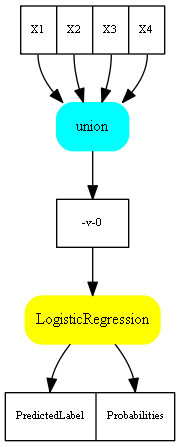

In [8]:
from PIL import Image
img = Image.open("graph.dot.png")
img

## Complex pipeline

*scikit-learn* instroduced a couple of transform to play with features in a single pipeline. The following example is taken from [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py).

In [9]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [10]:
columns = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
           'cabin', 'embarked', 'boat', 'body', 'home.dest']

numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])
clf

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [11]:
dot = pipeline2dot(clf, columns)

In [12]:
dot_file = "graph2.dot"
with open(dot_file, "w", encoding="utf-8") as f:
    f.write(dot)

In [13]:
cmd = "dot -G=300 -Tpng {0} -o{0}.png".format(dot_file)
run_cmd(cmd, wait=True, fLOG=print);

[run_cmd] execute dot -G=300 -Tpng graph2.dot -ograph2.dot.png
end of execution dot -G=300 -Tpng graph2.dot -ograph2.dot.png


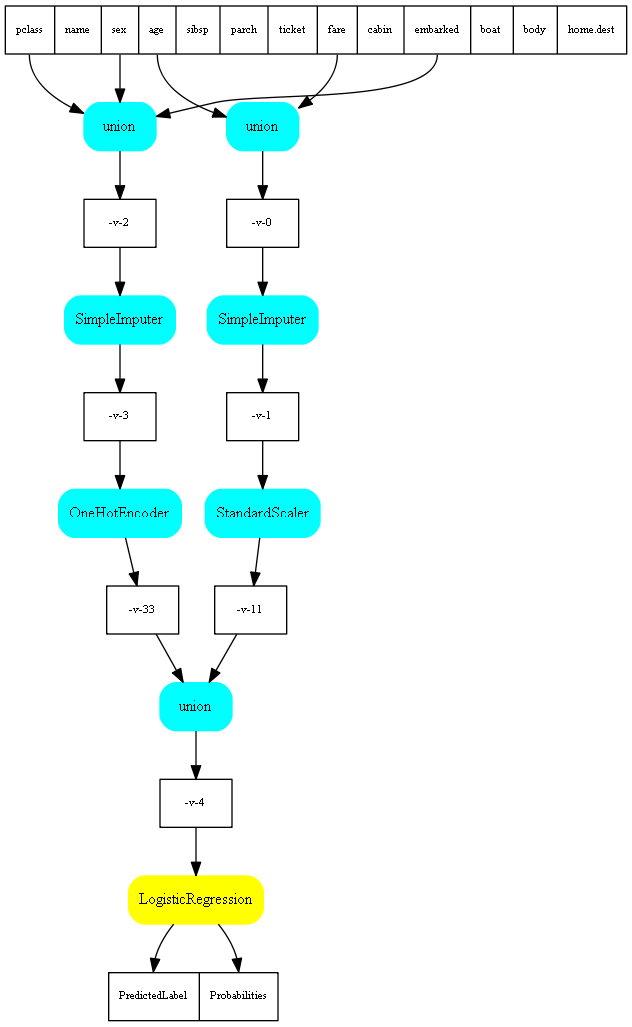

In [14]:
img = Image.open("graph2.dot.png")
img

## With javascript

In [15]:
from jyquickhelper import RenderJsDot
RenderJsDot(dot)